IMPORT LIBRARIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
                    'distance(km)':[10,20,30,40,50],
                    'price':[500,700,800,1000,1300]
})
df.head()

,distance(km),price
0,10,500
1,20,700
2,30,800
3,40,1000
4,50,1300


STEP 1: Define input (X) and output (y)

In [3]:
X = df[['distance(km)']]  # input feature
y = df['price']           # output (target)

- X is independent variable → already known

- y is dependent variable → have to predict 

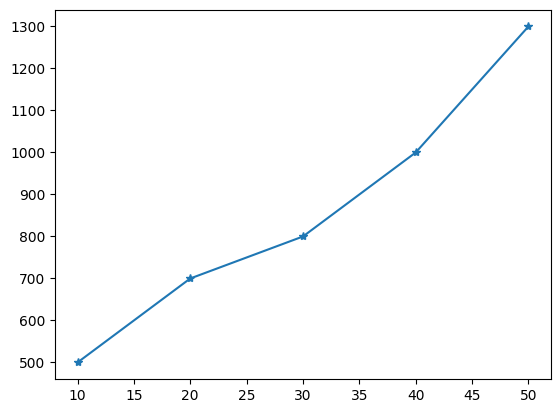

In [4]:
plt.plot(X, y,marker = '*')

Observation: The graph shows a linear relationship

STEP 2: Split the data into training and testing

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=40)

- Xtrain & Ytrain: used to teach the model.

- Xtest & Ytest: used to check how good the model is.

- random_state=40 ensures that every time you run it, you get the same split.

STEP 3: Create and train the model

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  # Step 1: create model

model.fit(Xtrain, Ytrain)   # Step 2: train model using training data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- fit() means the model learns the relationship between distance and price.

- It creates a line equation:

        y = m × x + c
        where:
        m is the slope (how much price increases per km),
        c is the intercept (base price when distance is zero).

See the model's equation

In [7]:
model.coef_      # slope (m)
model.intercept_ # intercept (c)

np.float64(305.0)

STEP 4: Make predictions

In [8]:
pred = model.predict(Xtest)
pred

array([875.])

- Model guesses prices for the test distances.

- Compare this with actual prices (Ytest).

In [9]:
Ytest

2    800
Name: price, dtype: int64

pred(predicted) = 875

Ytest(actual) = 800

The difference is 75(small difference)

MODEL EVALUATION

STEP 5: Check model score (accuracy)

In [10]:
model.score(Xtest,Ytest) # Test score shows how well it handles unseen data. Only the test score tells if the model is really useful.
# model.score(Xtrain,Ytrain) # Training score shows how well it learned known data.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(Ytest,pred)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

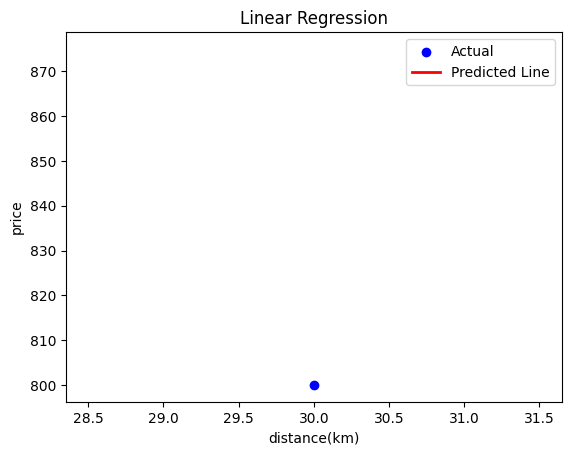

In [15]:
plt.scatter(Xtest, Ytest, color='blue', label='Actual')
plt.plot(Xtest, pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel('distance(km)')
plt.ylabel('price')
plt.title("Linear Regression")
plt.legend()
plt.show()  